In [ ]:
#imports όλων των βιβλιοθηκών που είναι απαραίτητες για το 1ο ερώτημα
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import cv2
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
from skimage import filters
from scipy import ndimage as ndi
from scipy import signal
from skimage.morphology import disk
from skimage import img_as_float
from skimage.filters import laplace
from skimage import feature
from skimage import util
from skimage import color


# Μέρος 1 
Στο ερώτημα αυτό θα χρησιμοποιήσουμε αλγορίθμους εύρεσης ακμών, για να παράξουμε ένα **cartoonified** αποτέλεσμα της εικόνας εισόδου. Το σκεπτικό είναι να εκμεταλευθούμε τις φυσικές ακμές της εικόνας για να δημιουργήσουμε "περιγράμματα".

**Ερώτημα 1**

Αρχικά, αφού ανεβάσαμε τις δύο εικόνες με τα πρόσωπα των μελών της ομάδας μας στο notebook, τις προσαρμόσαμε στις ζητούμενες από την εκφώνηση διαστάσεις (512x576) και στη συνέχεια τις ενώσαμε την μία δίπλα στην άλλη με τη χρήση κώδικα, δημιουργώντας μία ενιαία εικόνα την οποία και επεξεργαστήκαμε στα επόμενα ερωτήματα.

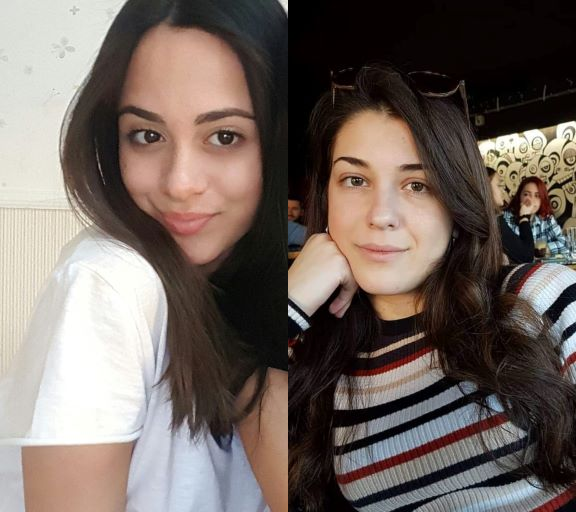

In [ ]:
#ορισμός συνάρτησης combine_images που έχει ως παραμέτρους 2 εικόνες και τις ενώνει σε μία ενιαία
def combine_images(im1,im2):
   #καθορισμός των διαστάσεων της ενιαίας εικόνας με βάση τις διαστάσεις που ζητούνται από την εκφώνηση
   height=512
   width=576
   img = np.zeros(shape=(height,width, 3))
   img[:512,:288]=im1
   img[:512,288:576]=im2
   return img
#εισαγωγή των 2 εικόνων τις οποίες έχουμε κάνει upload
imagea = cv2.imread('eirini.jpg')
imageb = cv2.imread('evaggelia.jpg')
height = 512
width=288
dim=(width,height)
#προσαρμογή των εικόνων στις επιθυμητές διαστάσεις
imagea = cv2.resize(imagea, dim, interpolation = cv2.INTER_AREA)
imageb = cv2.resize(imageb, dim, interpolation = cv2.INTER_AREA)
#εφαρμογή της συνάρτησης
output = combine_images(imagea,imageb)
#εμφάνιση της ενιαίας εικόνας
cv2_imshow(output)


**Ερώτημα 2**

Στη συνέχεια επιλέξαμε να μετατρέψουμε την εικόνα από τον χρωματικό χώρο του RGB (Red, Green, Blue) σε ασπρόμαυρο (GRAY). Η επιλογή αυτή έγινε καθώς χρειαζόμαστε μόνο το κανάλι φωτεινότητας για την ανίχνευση ακμών που θα γίνει στα παρακάτω ερωτήματα και παράλληλα έχει μικρότερο υπολογιστικό κόστος. 



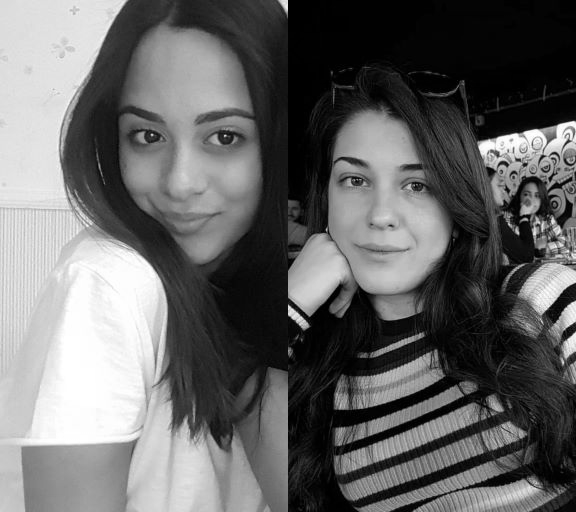

In [ ]:
#διαβάζουμε την εικόνα της οποίας τον χρωματικό χώρο θέλουμε να μεταβάλουμε ως πίνακα numpy ώστε να μπορούμε
#να επεξεργαστούμε τις τιμές των εικονοστοιχείων της κατάλληλα
output = np.array(output, dtype=np.uint8)
#μετατροπή της εικόνας σε κλίμακα grayscale
gray = cv2.cvtColor(output, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

**Ερώτημα 3**

Στο τρίτο ερώτημα εφαρμόστηκαν στην GRAY εικόνα Gaussian και Salt&Pepper θόρυβοι με τη βοήθεια του κώδικα που διδάχθηκε στα εργαστήρια του μαθήματος. Η τιμές των παραμέτρων seed και amount για τα δύο φίλτρα διαμορφώθηκαν με βάση την  εκφώνηση της άσκησης με τρόπο που εξηγήθηκε στα σχόλια του κώδικα. Παράλληλα δημιουργήθηκε και η συνάρτηση imshow_all ώστε να υπάρχει η δυνατότητα εμφάνισης πολλών εικόνων με μία μόνο εντολή.

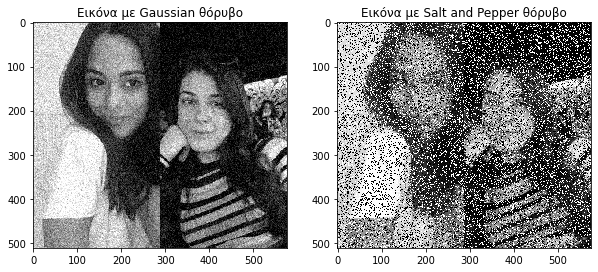

In [ ]:
#δημιουργία της συνάρτησης snpAmount η οποία θα χρειαστεί για τον καθορισμό της τιμής του amount στην προσθήκη
#του θορύβου salt&pepper στην εικόνα
def snpAmount(x):
  amount= x/90 + 0.3
  return amount

#δημιουργία της συνάρτησης imshow_all ώστε να μπορούμε να εμφανίσουμε πολλές εικόνες ταυτόχρονα με τη χρήση
#μίας εντολής (δημιουργήθηκε με βάση τις σημειώσεις του εργαστηρίου)
def imshow_all(*images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img,  cmap='gray', interpolation='None')#vmin=vmin, vmax=vmax,
        ax.set_title(label)
#ο ΑΜ μητρώου του 1ου μέλους της ομάδας (Ευαγγελία Ρεντίφη) είναι: el16164, επομένως το τελευταίο ψηφίο
#του ΑΜ της είναι:4, ενώ το προτελευταίο:6  
#εφαρμογή του θορύβου gauss με seed=4 (τελευταίο ψηφίο ΑΜ)
gauss=random_noise(gray, mode='gaussian',seed=4)
#εφαρμογή του θορύβου salt&pepper με seed=4 (τελευταίο ψηφίο ΑΜ) και amount που υπολογίζεται από τη συνάρτηση 
#snpAmount που ορίσαμε παραπάνω, με x=6 (προτελευταίο ψηφίο ΑΜ)
sp=random_noise(gray, mode='s&p',seed=4,amount=snpAmount(6))
#εμφάνιση των 2 εικόνων μετά την εφαρμογή των φίλτρων
imshow_all (gauss,sp ,titles =['Εικόνα με Gaussian θόρυβο','Εικόνα με Salt and Pepper θόρυβο'])


**Ερώτημα 4**

Στο ερώτημα αυτό εφαρμόσαμε σε καθεμία από τις εικόνες που δημιουργήθηκαν παραπάνω τα φίλτρα: mean, median και gaussian και παράλληλα πειραματιστήκαμε με τις διάφορες παραμέτρους τους ώστε να πάρουμε το βέλτιστο αποτέλεσμα. Με βάση τις εικόνες που παράχθηκαν παρατηρήσαμε ότι στην salt&pepper εικόνα επιτεύχθηκε καλύτερη αποθορυβοποίηση με τη χρήση του median φίλτρου. Αυτό συνέβη διότι σε αντίθεση με τα άλλα δύο φίλτρα, το median φίλτρο μπορεί να αφαιρέσει τον ανεπιθύμητο θόρυβο χωρίς να κάνει blur και να αλλοιώσει τις ακμές της εικόνας, με αποτέλεσμα η εικόνα τα διατηρεί τις διάφορες λεπτομέρειές της. Στην εικόνα με θόρυβο gauss αντίθετα, καλύτερα αποτελέσματα είχαν τα gauss και mean φίλτρα. Μία άλλη σημαντική παρατήρηση που μπορούμε να κάνουμε εδώ είναι ότι, κατά κανόνα, όσο αυξάνεται το μέγεθος της γειτονιάς (παράμετρος sigma στο gaussian και neighborhood στα mean και median) τόσο χειρότερα αποτελέσματα έχουμε αφού λόγω της συγχώνευσης (ή ευρεσης μέσης τιμής) περισσότερων pixel (λόγω μεγαλύτερης γειτονιάς) χάνονται και πάλι οι λεπτομέρειες.

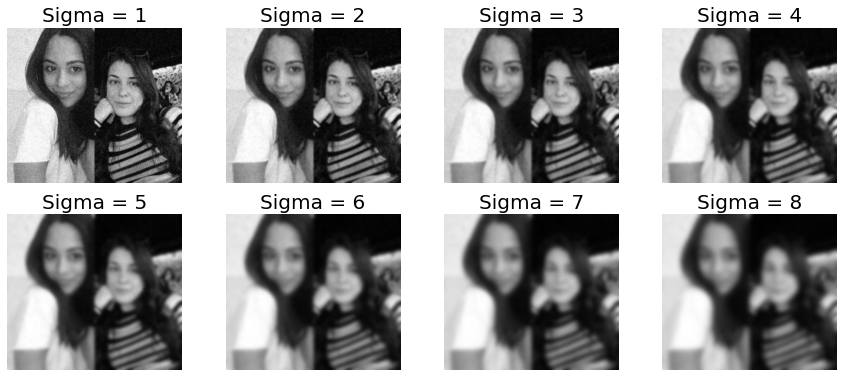

In [ ]:
#εικόνα με θόρυβο gauss

#φίλτρο Gauss
#καθορισμός μεγέθους εικόνας
pylab.figure(figsize=(15,20))
#δημιουργία for loop ώστε να γίνει πειραματισμός της παραμέτρου sigma σε ένα range από 1 έως 8
for sigma in list(range(1,9)):
    #εφαρμογή του φίλτρου gauss
    gauss_gauss=filters.gaussian(gauss, sigma=sigma)
    pylab.subplot(6,4,sigma), pylab.imshow(gauss_gauss, cmap='gray'), pylab.axis('off')
    pylab.title('Sigma = ' + str(sigma), size=20)

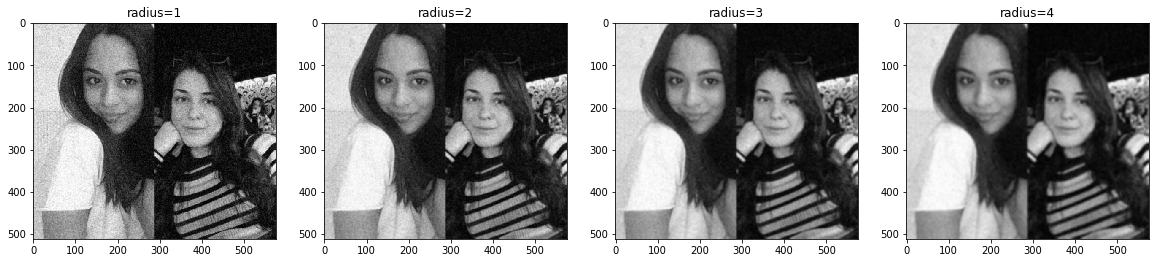

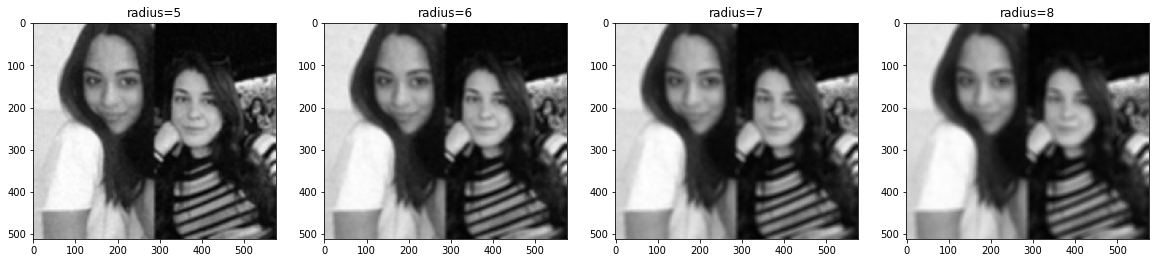

In [ ]:
#mean φίλτρο
#πειραματισμός με το μέγεθος της γειτονίας (neighborhood) από 1-8
neighborhood = disk(radius=1)
mean_gauss1 = filters.rank.mean(util.img_as_ubyte(gauss), neighborhood)

neighborhood = disk(radius=2)
mean_gauss2 = filters.rank.mean(util.img_as_ubyte(gauss), neighborhood)

neighborhood = disk(radius=3)
mean_gauss3 = filters.rank.mean(util.img_as_ubyte(gauss), neighborhood)

neighborhood = disk(radius=4)
mean_gauss4 = filters.rank.mean(util.img_as_ubyte(gauss), neighborhood)

neighborhood = disk(radius=5)
mean_gauss5 = filters.rank.mean(util.img_as_ubyte(gauss), neighborhood)

neighborhood = disk(radius=6)
mean_gauss6 = filters.rank.mean(util.img_as_ubyte(gauss), neighborhood)

neighborhood = disk(radius=7)
mean_gauss7 = filters.rank.mean(util.img_as_ubyte(gauss), neighborhood)

neighborhood = disk(radius=8)
mean_gauss8 = filters.rank.mean(util.img_as_ubyte(gauss), neighborhood)
#εμφάνιση των εικόνων
imshow_all (mean_gauss1,mean_gauss2,mean_gauss3,mean_gauss4,titles =['radius=1','radius=2','radius=3','radius=4'])
imshow_all (mean_gauss5,mean_gauss6,mean_gauss7,mean_gauss8,titles =['radius=5','radius=6','radius=7','radius=8'])


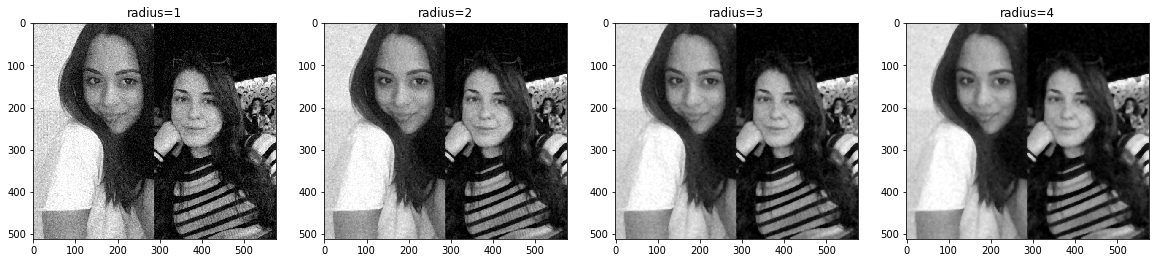

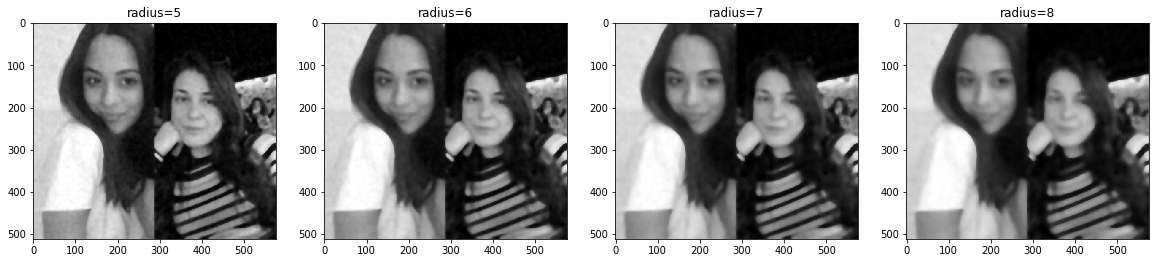

In [ ]:
#median φιλτρο
#πειραματισμός με το μέγεθος της γειτονίας (neighborhood) από 1-8
neighborhood = disk(radius=1)
median_gauss1 = filters.rank.median(util.img_as_ubyte(gauss), neighborhood)

neighborhood = disk(radius=2)
median_gauss2 = filters.rank.median(util.img_as_ubyte(gauss), neighborhood)
neighborhood = disk(radius=3)
median_gauss3 = filters.rank.median(util.img_as_ubyte(gauss), neighborhood)
neighborhood = disk(radius=4)
median_gauss4 = filters.rank.median(util.img_as_ubyte(gauss), neighborhood)
neighborhood = disk(radius=5)
median_gauss5 = filters.rank.median(util.img_as_ubyte(gauss), neighborhood)
neighborhood = disk(radius=6)
median_gauss6 = filters.rank.median(util.img_as_ubyte(gauss), neighborhood)
neighborhood = disk(radius=7)
median_gauss7 = filters.rank.median(util.img_as_ubyte(gauss), neighborhood)
neighborhood = disk(radius=8)
median_gauss8 = filters.rank.median(util.img_as_ubyte(gauss), neighborhood)
#εμφάνιση των εικόνων
imshow_all (median_gauss1,median_gauss2,median_gauss3,median_gauss4,titles =['radius=1','radius=2','radius=3','radius=4'])
imshow_all (median_gauss5,median_gauss6,median_gauss7,median_gauss8,titles =['radius=5','radius=6','radius=7','radius=8'])


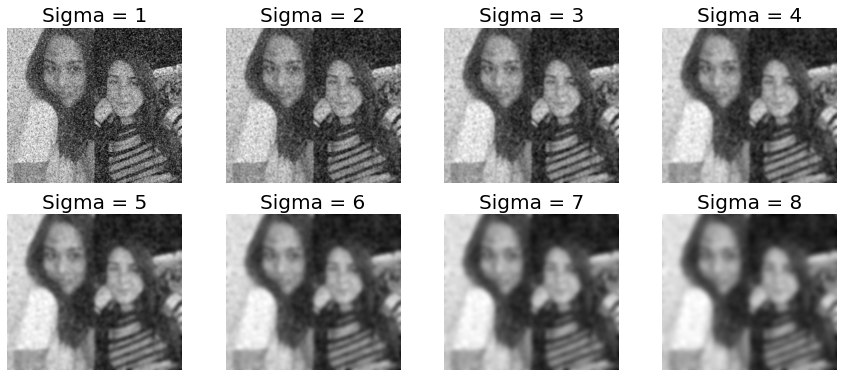

In [ ]:
#εικόνα με θόρυβο salt&pepper

#εργαστήκαμε αντίστοιχα με την εφαρμοφή των φίλτρων της gauss εικόνας
#φίλτρο Gauss
pylab.figure(figsize=(15,20))

for sigma in list(range(1,9)):
    gauss_sp=filters.gaussian(sp, sigma=sigma)
    pylab.subplot(6,4,sigma), pylab.imshow(gauss_sp, cmap='gray'), pylab.axis('off')
    pylab.title('Sigma = ' + str(sigma), size=20)







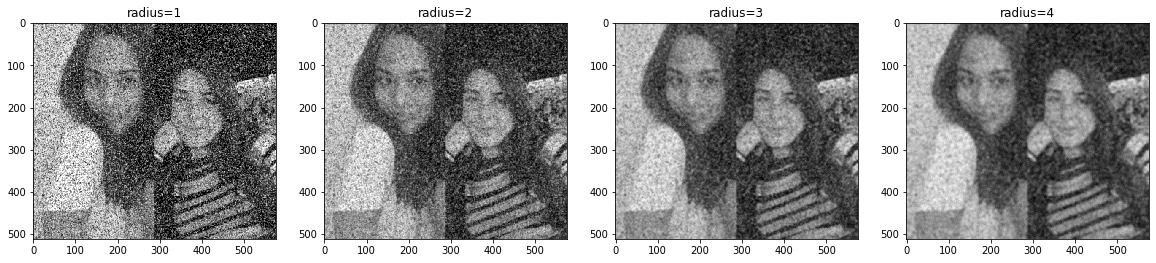

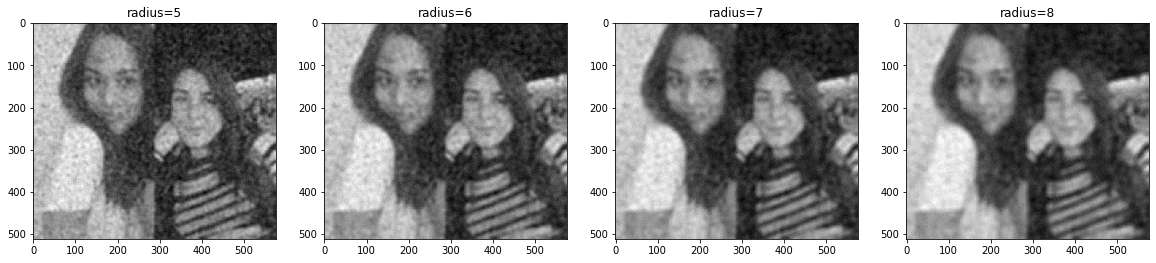

In [ ]:
#mean φίλτρο
#πειραματισμός με το μέγεθος της γειτονίας (neighborhood) από 1-8
neighborhood = disk(radius=1)
mean_sp1 = filters.rank.mean(util.img_as_ubyte(sp), neighborhood)

neighborhood = disk(radius=2)
mean_sp2 = filters.rank.mean(util.img_as_ubyte(sp), neighborhood)

neighborhood = disk(radius=3)
mean_sp3 = filters.rank.mean(util.img_as_ubyte(sp), neighborhood)

neighborhood = disk(radius=4)
mean_sp4 = filters.rank.mean(util.img_as_ubyte(sp), neighborhood)

neighborhood = disk(radius=5)
mean_sp5 = filters.rank.mean(util.img_as_ubyte(sp), neighborhood)

neighborhood = disk(radius=6)
mean_sp6 = filters.rank.mean(util.img_as_ubyte(sp), neighborhood)

neighborhood = disk(radius=7)
mean_sp7 = filters.rank.mean(util.img_as_ubyte(sp), neighborhood)

neighborhood = disk(radius=8)
mean_sp8 = filters.rank.mean(util.img_as_ubyte(sp), neighborhood)
#εμφάνιση των εικόνων
imshow_all (mean_sp1,mean_sp2,mean_sp3,mean_sp4,titles =['radius=1','radius=2','radius=3','radius=4'])
imshow_all (mean_sp5,mean_sp6,mean_sp7,mean_sp8,titles =['radius=5','radius=6','radius=7','radius=8'])


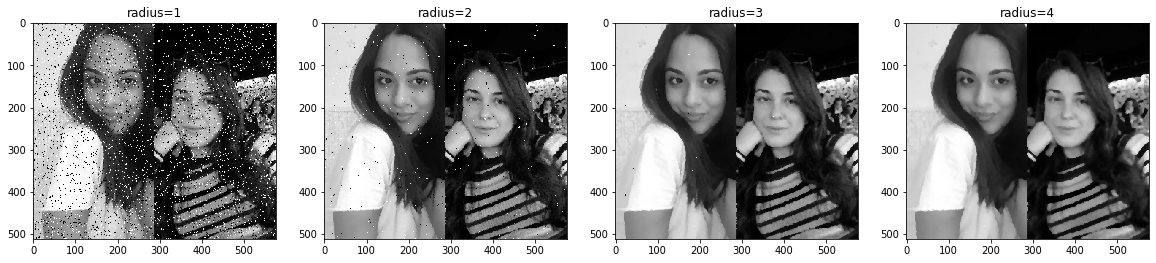

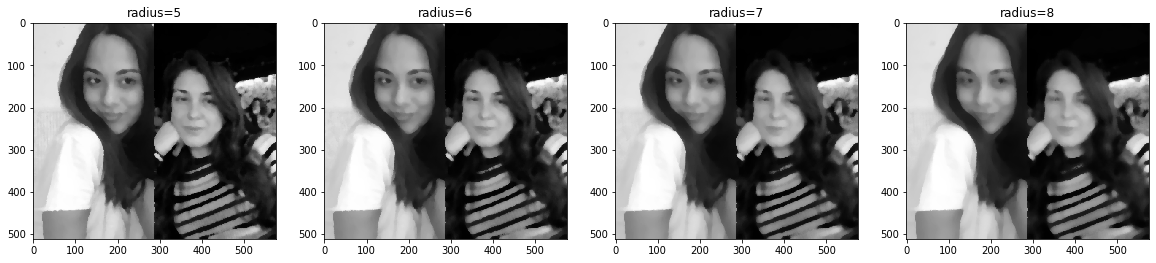

In [ ]:
#median φιλτρο
#πειραματισμός με το μέγεθος της γειτονίας (neighborhood) από 1-8
neighborhood = disk(radius=1)
median_sp1 = filters.rank.median(util.img_as_ubyte(sp), neighborhood)
neighborhood = disk(radius=2)
median_sp2 = filters.rank.median(util.img_as_ubyte(sp), neighborhood)
neighborhood = disk(radius=3)
median_sp3 = filters.rank.median(util.img_as_ubyte(sp), neighborhood)
neighborhood = disk(radius=4)
median_sp4 = filters.rank.median(util.img_as_ubyte(sp), neighborhood)
neighborhood = disk(radius=5)
median_sp5 = filters.rank.median(util.img_as_ubyte(sp), neighborhood)
neighborhood = disk(radius=6)
median_sp6 = filters.rank.median(util.img_as_ubyte(sp), neighborhood)
neighborhood = disk(radius=7)
median_sp7 = filters.rank.median(util.img_as_ubyte(sp), neighborhood)
neighborhood = disk(radius=8)
median_sp8 = filters.rank.median(util.img_as_ubyte(sp), neighborhood)
#εμφάνιση των εικόνων
imshow_all (median_sp1,median_sp2,median_sp3,median_sp4,titles =['radius=1','radius=2','radius=3','radius=4'])
imshow_all (median_sp5,median_sp6,median_sp7,median_sp8,titles =['radius=5','radius=6','radius=7','radius=8'])


**Ερώτημα 5**

Στη συνέχεια επιλέγοντας το median ως καλύτερο αποτέλεσμα των salt&pepper και gaussian θορύβων εφαρμόσαμε στις εικόνες αυτές τους ανιχνευτές ακμών Laplacian, Canny και Marr-Hildreth και πειραματιστήκαμε με τις παραμέτρους τους ώστε να δούμε ποιες από αυτές μπορούν να μας δώσουν τα καλύτερα αποτελέσματα.

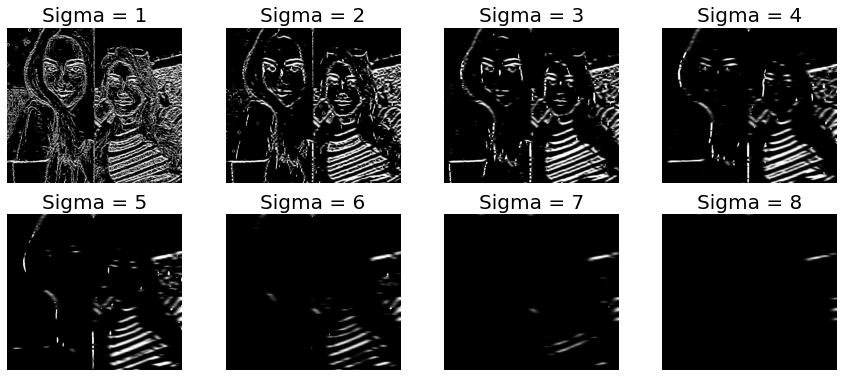

In [ ]:
#επιλέγουμε το αποτέλεσμα του median φιλτρου για salt&pepper θόρυβο
# Marr-Hildreth ανιχνευτής ακμών, επιλέγοντας το αποτέλεσμα του median φιλτρου για salt&pepper θόρυβο
#καθορισμός μεγέθους εικόνων
pylab.figure(figsize=(15,20))
#δημιουργία for loop ώστε να γίνει πειραματισμός της παραμέτρου sigma σε ένα range από 1 έως 8
for sigma in list(range(1,9)):
    img_log=ndi.gaussian_laplace(median_sp3, sigma=sigma)  
    pylab.subplot(6,4,sigma), pylab.imshow(img_log, cmap='gray'), pylab.axis('off')
    pylab.title('Sigma = ' + str(sigma), size=20)


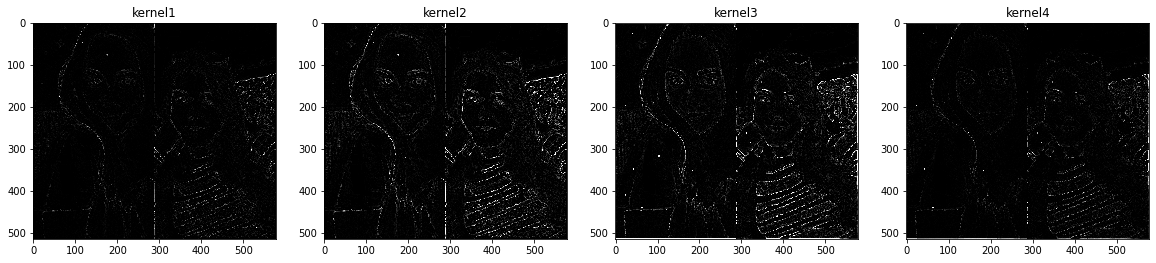

In [ ]:
# Laplacian ανιχνευτής ακμών, επιλέγοντας το αποτέλεσμα του median φιλτρου για salt&pepper θόρυβο
#δημιουργία 4 διαφορετικών kernels για πειραματισμό
laplacian_kernel1 = [[0,1,0],[1,-4,1],[0,1,0]]
laplacian_kernel2=[[1,1,1],[1,-8, 1],[1,1,1]]
laplacian_kernel3=[[-1,-1,-1],[-1, 8, -1],[-1,-1,-1]]
laplacian_kernel4=[[0,-1,0],[-1, 4, -1],[0,-1,0]]
#εφαρμογή του φίλτου για τους διάφορους kernels που ορίσαμε παραπάνω
laplace1_sp= np.clip(signal.convolve2d(median_sp3, laplacian_kernel1),0,255)
laplace2_sp= np.clip(signal.convolve2d(median_sp3, laplacian_kernel2),0,255)
laplace3_sp= np.clip(signal.convolve2d(median_sp3, laplacian_kernel3),0,255)
laplace4_sp= np.clip(signal.convolve2d(median_sp3, laplacian_kernel4),0,255)
 #εμφάνιση των εικόνων 
imshow_all(laplace1_sp,laplace2_sp,laplace3_sp,laplace4_sp,titles=['kernel1','kernel2','kernel3','kernel4'])

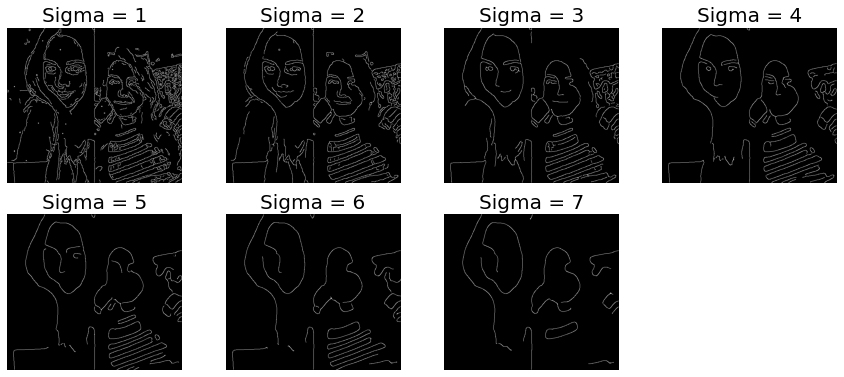

In [ ]:
# Canny ανιχνευτής ακμών, επιλέγοντας το αποτέλεσμα του median φιλτρου για salt&pepper θόρυβο
#καθοριμός μεγέθους εικόνων
pylab.figure(figsize=(15,20))
#δημιουργία for loop ώστε να γίνει πειραματισμός της παραμέτρου sigma σε ένα range από 1 έως 8
for sigma in list(range(1,8)):
    edges=feature.canny(median_sp3, sigma=sigma) 
    pylab.subplot(6,4,sigma), pylab.imshow(edges, cmap='gray'), pylab.axis('off')
    pylab.title('Sigma = ' + str(sigma), size=20)

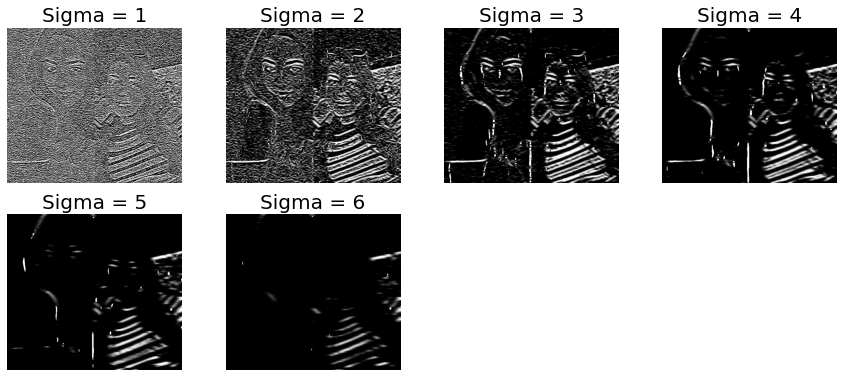

In [ ]:
#επιλέγουμε το αποτέλεσμα του mean φιλτρου για gaussian θόρυβο
#εργαστήκαμε αντίστοιχα με την εφαρμογή των ανιχνευτών ακμών στον salt%pepper θόρυβο
# Marr-Hildreth ανιχνευτής ακμών, επιλέγοντας το αποτέλεσμα του median φιλτρου για salt&pepper θόρυβο
pylab.figure(figsize=(15,20))
#δημιουργία for loop ώστε να γίνει πειραματισμός της παραμέτρου sigma σε ένα range από 1 έως 6
for sigma in list(range(1,7)):
    img_log=ndi.gaussian_laplace(mean_gauss1, sigma=sigma)  
    pylab.subplot(6,4,sigma), pylab.imshow(img_log, cmap='gray'), pylab.axis('off')
    pylab.title('Sigma = ' + str(sigma), size=20)

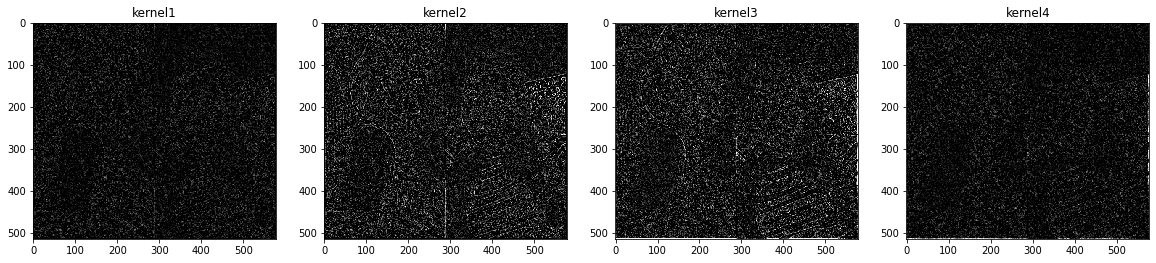

In [ ]:
# Laplacian ανιχνευτής ακμών, επιλέγοντας το αποτέλεσμα του median φιλτρου για gauss θόρυβο
#εφαρμογή του ανιχνευτή για τους διάφορους kernels που ορίσαμε παραπάνω
laplace1= np.clip(signal.convolve2d(mean_gauss1, laplacian_kernel1),0,255)
laplace2= np.clip(signal.convolve2d(mean_gauss1, laplacian_kernel2),0,255)
laplace3= np.clip(signal.convolve2d(mean_gauss1, laplacian_kernel3),0,255)
laplace4= np.clip(signal.convolve2d(mean_gauss1, laplacian_kernel4),0,255)
  
imshow_all(laplace1,laplace2,laplace3,laplace4 ,titles=['kernel1','kernel2','kernel3','kernel4'])

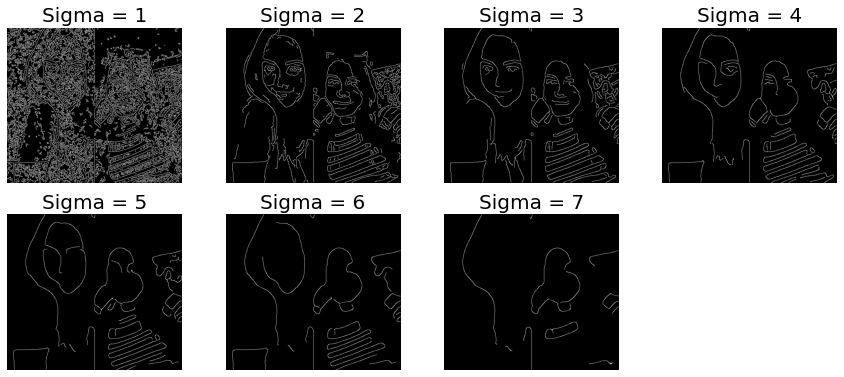

In [ ]:
# Canny ανιχνευτής ακμών, επιλέγοντας το αποτέλεσμα του median φιλτρου για salt&pepper θόρυβο
pylab.figure(figsize=(15,20))
#δημιουργία for loop ώστε να γίνει πειραματισμός της παραμέτρου sigma σε ένα range από 1 έως 7
for sigma in list(range(1,8)):
    edges=feature.canny(mean_gauss1, sigma=sigma) 
    pylab.subplot(6,4,sigma), pylab.imshow(edges, cmap='gray'), pylab.axis('off')
    pylab.title('Sigma = ' + str(sigma), size=20)

**Ερώτημα 6**

Στο τελευταίο ερώτημα δημιουργήσαμε κατάλληλη συνάρτηση cartoonify η οποία δέχεται ως είσοδο την αρχική μας εικόνα και μια εικόνα ακμών και επιστρέφει μια εικόνα της οποίας τα pixel της αρχικής εικόνας, που αντιστοιχούν στα pixel ακμών της εικόνας ακμών έχουν αντικατασταθεί με μαύρο χρώμα. Ως εικόνες ακμών χρησιμοποιήθηκαν οι εικόνες με τα καλύτερα αποτελέσματα που δημιουργήθηκαν στο ερώτημα 5. Όπως φαίνεται και από τις εικόνες που παράχθηκαν, με τον συνδυασμό της αρχικής εικόνας με τον ανιχνευτή ακμών Marr-Hildreth δεν έχουμε καθαρή εικόνα ενώ με τον Laplace παρόλο που η εικόνα είναι καθαρή δεν είναι τοσο ευδιάκριτο το μαύρο χρώμα των ακμών. Το αισθητικά καλύτερο αποτέλεσμα δίνει ο ανιχνευτής Canny, δινοντάς μας μια ευκρινή εικόνα με τονισμότων επιθυμητών ακμών.

In [ ]:
def cartoonify(source_img, edge_img): 
 edge_img = util.img_as_ubyte(edge_img)
 (x,y,z) = source_img.shape 
 edge_img = cv2.resize(edge_img,(y,x)) 
 edge_img = cv2.bitwise_not(edge_img)
 edge_img = color.gray2rgb(edge_img)
 cartoon = cv2.bitwise_and(edge_img,source_img)
 cv2_imshow(cartoon)


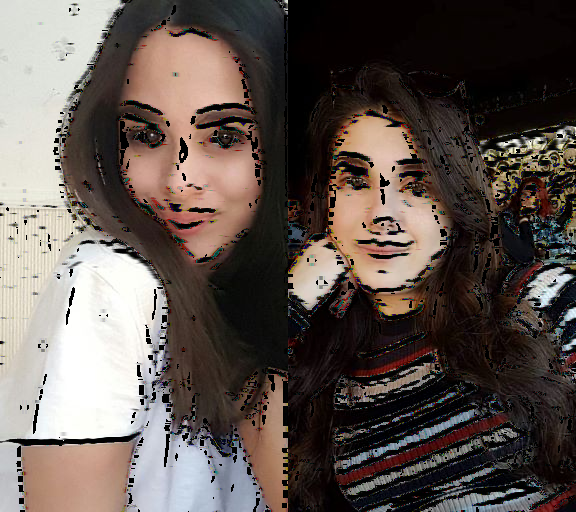

In [ ]:
#για την εικόνα που έχει προστεθέι sp θόρυβος επιλέγουμε τα καλύτερα αποτελέσματα
#για καθέναν απο τους ανιχνευτές ακμών
#Marr-Hildreth με sigma=2
img1=ndi.gaussian_laplace(median_sp3, sigma=2)
cartoonify(output, img1)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return convert(image, np.uint8, force_copy)


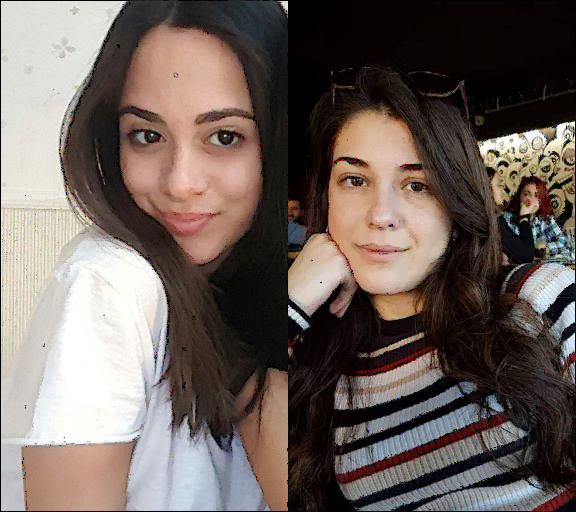

In [ ]:
#Laplace με τον laplacian_kernel2
cartoonify(output, laplace2_sp)

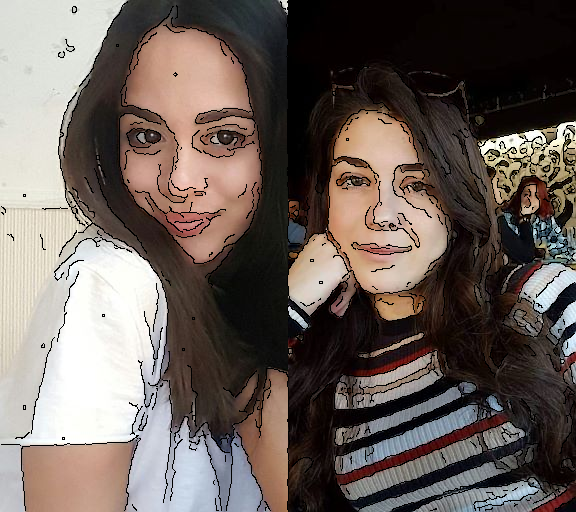

In [ ]:
#canny με sigma=1
img3=feature.canny(median_sp3, sigma=1) 
cartoonify(output, img3)


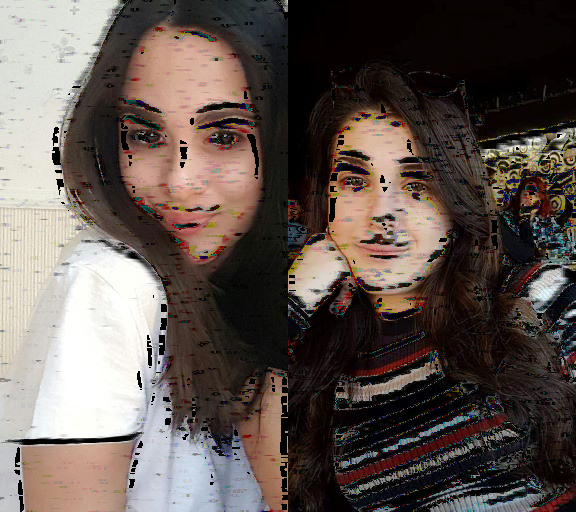

In [ ]:
#για την εικόνα που έχει προστεθέι gauss θόρυβος επιλέγουμε τα καλύτερα αποτελέσματα
#για καθέναν απο τους ανιχνευτές ακμών
#Marr-Hildreth με sigma=3
img4=ndi.gaussian_laplace(mean_gauss1, sigma=3)
cartoonify(output, img4)


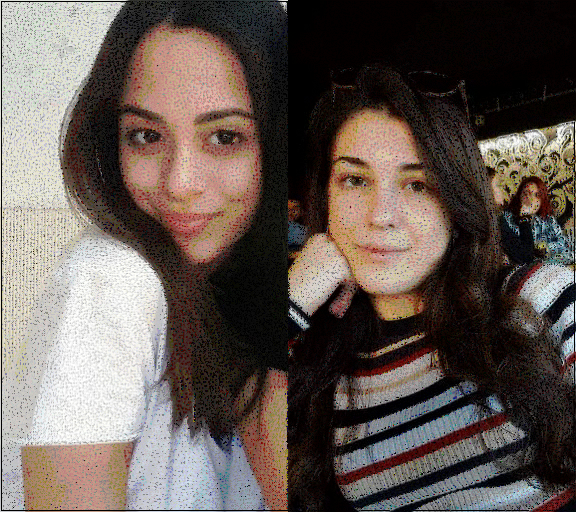

In [ ]:
#Laplace με laplacian_kernel3
laplace3 = np.array(laplace3, dtype=np.uint8)
cartoonify(output, laplace3)


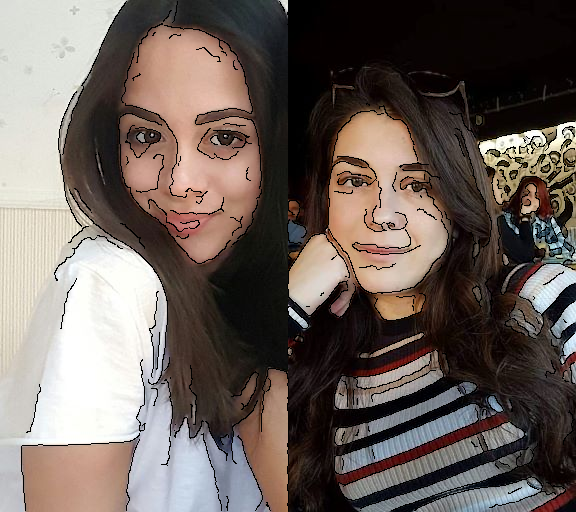

In [ ]:
#canny με sigma=2
img6=feature.canny(mean_gauss1, sigma=2) 
cartoonify(output, img6)

# Μέρος 2 

Στο ερώτημα αυτό  χρησιμοποιήσαμε αλγορίθμους εξαγωγής χαρακτηριστικών, καθώς και τεχνικές εκτίμησης κίνησης, για **να εντοπίσουμε τα κινούμενα στοιχεία σε surveillance videos**. Ο κώδικας του συγκεκριμένου ερωτήματος παρατίθεται σε ξεχωριστό αρχείο **.py**.


Για το ερώτημα αυτό, κατεβάσαμε και χρησιμοποιήσαμε για είσοδο ένα συγκεκριμένο βίντεο από το [VIRAT dataset](https://viratdata.org/). 

Για την υλοποιήση του ερωτήματος ακολουθήσαμε τα εξής βήματα:

1.   Κατεβάσαμε τοπικά το αρχείο βίντεο που αντιστοιχεί στην ομάδα μας. Κάθε frame που διαβάζετε από το βίντεο έγινε **resize** στη **μισή ανάλυση από την αρχική**.

2.Επιλογή του κατάλληλου χρωματικού χώρου για την εικόνα εισόδου μας.

3.Εφαρμογή **Harris** και **Shi-Tomasi** corner detectors στο **πρώτο frame** του βίντεο. Πειραματιστήκαμε με τις παραμέτρους των μεθόδων, με στόχο το καλύτερο δυνατό αποτέλεσμα "περιγραφής" των αντικειμένων στην εικόνα( `maxCorners`, `qualityLevel` και `minDistance`).

  

4. Εφαρμόσαμε τον αλγόριθμο Lucas-Kanade για υπολογισμό optical flow στα **Harris** και **Shi-Tomasi** σημεία του προηγούμενου βήματος.Πειραματιστηκαμε με τις παραμέτρους των μεθόδων, με στόχο το καλύτερο δυνατό αποτέλεσμα στο βίντεο της ομάδας σας (`winSize`, `maxLevel` και `criteria`κα)
  



5. Τροποποίηση του κώδικα του βήματος 4, με στόχο την παρακολούθηση γωνιών **Harris** και **Shi-Tomasi** που εμφανίσθηκαν στο βίντεο **μετά** το πρώτο frame. Ακολουθήθηκαν τα παρακάτω:
  *   Εφαρμογή των παραμέτρων που μας έδωσαν το καλύτερο αποτέλεσμα στα βήματα 3 και 4.
  *   **Ενημερώση** των σημείων που παρακολουθούνται ανά τακτικά διαστήματα, αλλά όχι σε κάθε frame.
  *  Επισημειώση **μόνο** των σημείων που αλλάζουν σημαντικά θέση (μετακίνηση πάνω από ένα pixel σε μια από τις διαστάσεις)

  



6. Τροποποίηση του κώδικά  για το βήμα 5, εισάγοντας **Salt and Pepper θόρυβο** μετά από κάθε "διάβασμα" ενός frame.
 

7. Στον κώδικα του βήματος 6, εφαρμόσαμε κατάλληλη αποθορυβοποίηση, όπως αυτήν που σας έδωσε το καλύτερο αποτέλεσμα στο **βήμα 4 του Ερωτήματος 1**, πριν την εισαγωγή του κάθε frame στον αλγόριθμο. 